In [ ]:
import torch
import torchvision  # type: ignore
import torch.nn as nn
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
batch_size_train = 128
batch_size_test = 1000

In [ ]:
train_loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST(root='./data', train=True, download=True,
                                   transform=torchvision.transforms.Compose([
                                       torchvision.transforms.ToTensor(),
                                       torchvision.transforms.Normalize((0.1307,), (0.3081,))
                                   ])), batch_size=batch_size_train, shuffle=True
    )
test_loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST(root='./data', train=False, download=True,
                                   transform=torchvision.transforms.Compose([
                                       torchvision.transforms.ToTensor(),
                                       torchvision.transforms.Normalize((0.1307,), (0.3081,))
                                   ])), batch_size=batch_size_test, shuffle=True
    )

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.act = nn.LeakyReLU(0.2)
        self.dropout = nn.Dropout(0.5)
        self.maxpool = nn.MaxPool2d(2, 2)
        self.conv_0 = nn.Conv2d(1, 8, 3, 1)
        self.conv_1 = nn.Conv2d(8, 16, 3, 1)
        self.conv_2 = nn.Conv2d(16, 32, 3, 1)

        self.flatten = nn.Flatten()
        self.linear_1 = nn.Linear(32, 25)
        self.linear_2 = nn.Linear(25, 15)
        self.linear_3 = nn.Linear(15, 10)

    def forward(self, x):
        out = self.conv_0(x)
        out = self.act(out)
        out = self.maxpool(out)

        out = self.conv_1(out)
        out = self.act(out)
        out = self.maxpool(out)
        out = self.dropout(out)

        out = self.conv_2(out)
        out = self.act(out)
        out = self.maxpool(out)
        out = self.dropout(out)

        out = self.flatten(out)
        out = self.linear_1(out)
        out = self.act(out)
        out = self.linear_2(out)
        out = self.act(out)
        out = self.linear_3(out)

        return out


In [ ]:
def train(device, model, train_loader, learning_rate=1, epochs=5):
    loss_fn = nn.CrossEntropyLoss().to(device)
    optimizer = torch.optim.Adadelta(model.parameters(), lr=learning_rate)
    loss_history = []

    for epoch in tqdm(range(epochs), desc="Training Progress"):
        total_loss = 0.0

        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()

            predictions = model(inputs)
            loss = loss_fn(predictions, targets)
            total_loss += loss.item()

            loss.backward()
            optimizer.step()

        avg_loss = total_loss / len(train_loader)
        loss_history.append(avg_loss)

        print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")

    plt.figure(figsize=(10, 5))
    plt.plot(loss_history, marker='o', linestyle='-', color='b')
    plt.xlabel('Epoch')
    plt.ylabel('Average Loss')
    plt.title('Training Loss per Epoch')
    plt.grid(True)
    plt.show()

In [ ]:
def test(model, device, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Accuracy on the test set: {accuracy:.2%}")


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)

Training Progress:   1%|          | 1/100 [00:14<23:55, 14.50s/it]

Epoch 1/100, Loss: 0.0630


Training Progress:   2%|▏         | 2/100 [00:28<23:38, 14.47s/it]

Epoch 2/100, Loss: 0.0509


Training Progress:   3%|▎         | 3/100 [00:43<23:20, 14.43s/it]

Epoch 3/100, Loss: 0.0445


Training Progress:   4%|▍         | 4/100 [00:57<23:04, 14.42s/it]

Epoch 4/100, Loss: 0.0408


Training Progress:   5%|▌         | 5/100 [01:12<23:16, 14.70s/it]

Epoch 5/100, Loss: 0.0369


Training Progress:   6%|▌         | 6/100 [01:27<22:48, 14.56s/it]

Epoch 6/100, Loss: 0.0339


Training Progress:   7%|▋         | 7/100 [01:41<22:26, 14.48s/it]

Epoch 7/100, Loss: 0.0319


Training Progress:   8%|▊         | 8/100 [01:55<22:05, 14.41s/it]

Epoch 8/100, Loss: 0.0284


Training Progress:   9%|▉         | 9/100 [02:10<21:49, 14.39s/it]

Epoch 9/100, Loss: 0.0265


Training Progress:  10%|█         | 10/100 [02:24<21:42, 14.48s/it]

Epoch 10/100, Loss: 0.0244


Training Progress:  11%|█         | 11/100 [02:39<21:34, 14.54s/it]

Epoch 11/100, Loss: 0.0232


Training Progress:  12%|█▏        | 12/100 [02:53<21:15, 14.50s/it]

Epoch 12/100, Loss: 0.0216


Training Progress:  13%|█▎        | 13/100 [03:08<20:55, 14.44s/it]

Epoch 13/100, Loss: 0.0203


Training Progress:  14%|█▍        | 14/100 [03:22<20:39, 14.41s/it]

Epoch 14/100, Loss: 0.0191


Training Progress:  15%|█▌        | 15/100 [03:36<20:23, 14.39s/it]

Epoch 15/100, Loss: 0.0168


Training Progress:  16%|█▌        | 16/100 [03:52<20:28, 14.62s/it]

Epoch 16/100, Loss: 0.0160


Training Progress:  17%|█▋        | 17/100 [04:06<20:10, 14.59s/it]

Epoch 17/100, Loss: 0.0160


Training Progress:  18%|█▊        | 18/100 [04:20<19:48, 14.50s/it]

Epoch 18/100, Loss: 0.0143


Training Progress:  19%|█▉        | 19/100 [04:35<19:33, 14.49s/it]

Epoch 19/100, Loss: 0.0132


Training Progress:  20%|██        | 20/100 [04:50<19:27, 14.59s/it]

Epoch 20/100, Loss: 0.0133


Training Progress:  21%|██        | 21/100 [05:05<19:30, 14.82s/it]

Epoch 21/100, Loss: 0.0119


Training Progress:  22%|██▏       | 22/100 [05:20<19:13, 14.79s/it]

Epoch 22/100, Loss: 0.0113


Training Progress:  23%|██▎       | 23/100 [05:34<18:53, 14.72s/it]

Epoch 23/100, Loss: 0.0104


Training Progress:  24%|██▍       | 24/100 [05:49<18:38, 14.72s/it]

Epoch 24/100, Loss: 0.0105


Training Progress:  25%|██▌       | 25/100 [06:04<18:29, 14.79s/it]

Epoch 25/100, Loss: 0.0095


Training Progress:  26%|██▌       | 26/100 [06:19<18:27, 14.96s/it]

Epoch 26/100, Loss: 0.0083


Training Progress:  27%|██▋       | 27/100 [06:34<18:05, 14.87s/it]

Epoch 27/100, Loss: 0.0083


Training Progress:  28%|██▊       | 28/100 [06:49<17:48, 14.84s/it]

Epoch 28/100, Loss: 0.0081


Training Progress:  29%|██▉       | 29/100 [07:03<17:28, 14.77s/it]

Epoch 29/100, Loss: 0.0069


Training Progress:  30%|███       | 30/100 [07:18<17:19, 14.85s/it]

Epoch 30/100, Loss: 0.0069


Training Progress:  31%|███       | 31/100 [07:33<17:04, 14.85s/it]

Epoch 31/100, Loss: 0.0065


Training Progress:  32%|███▏      | 32/100 [07:48<16:42, 14.75s/it]

Epoch 32/100, Loss: 0.0063


Training Progress:  33%|███▎      | 33/100 [08:02<16:23, 14.68s/it]

Epoch 33/100, Loss: 0.0067


Training Progress:  34%|███▍      | 34/100 [08:17<16:09, 14.70s/it]

Epoch 34/100, Loss: 0.0061


Training Progress:  35%|███▌      | 35/100 [08:32<16:03, 14.82s/it]

Epoch 35/100, Loss: 0.0052


Training Progress:  36%|███▌      | 36/100 [08:47<15:50, 14.85s/it]

Epoch 36/100, Loss: 0.0048


Training Progress:  37%|███▋      | 37/100 [09:02<15:31, 14.79s/it]

Epoch 37/100, Loss: 0.0062


Training Progress:  38%|███▊      | 38/100 [09:16<15:15, 14.77s/it]

Epoch 38/100, Loss: 0.0046


Training Progress:  39%|███▉      | 39/100 [09:31<14:56, 14.70s/it]

Epoch 39/100, Loss: 0.0042


Training Progress:  40%|████      | 40/100 [09:46<14:55, 14.93s/it]

Epoch 40/100, Loss: 0.0043


Training Progress:  41%|████      | 41/100 [10:01<14:33, 14.80s/it]

Epoch 41/100, Loss: 0.0037


Training Progress:  42%|████▏     | 42/100 [10:15<14:11, 14.69s/it]

Epoch 42/100, Loss: 0.0033


Training Progress:  43%|████▎     | 43/100 [10:30<13:51, 14.59s/it]

Epoch 43/100, Loss: 0.0037


Training Progress:  44%|████▍     | 44/100 [10:44<13:31, 14.49s/it]

Epoch 44/100, Loss: 0.0038


Training Progress:  45%|████▌     | 45/100 [10:59<13:20, 14.55s/it]

Epoch 45/100, Loss: 0.0031


Training Progress:  46%|████▌     | 46/100 [11:13<13:08, 14.60s/it]

Epoch 46/100, Loss: 0.0034


Training Progress:  47%|████▋     | 47/100 [11:28<12:50, 14.53s/it]

Epoch 47/100, Loss: 0.0047


Training Progress:  48%|████▊     | 48/100 [11:42<12:32, 14.47s/it]

Epoch 48/100, Loss: 0.0036


Training Progress:  49%|████▉     | 49/100 [11:56<12:16, 14.45s/it]

Epoch 49/100, Loss: 0.0048


Training Progress:  50%|█████     | 50/100 [12:11<12:01, 14.43s/it]

Epoch 50/100, Loss: 0.0025


Training Progress:  51%|█████     | 51/100 [12:26<11:56, 14.63s/it]

Epoch 51/100, Loss: 0.0029


Training Progress:  52%|█████▏    | 52/100 [12:40<11:38, 14.54s/it]

Epoch 52/100, Loss: 0.0032


Training Progress:  53%|█████▎    | 53/100 [12:55<11:21, 14.49s/it]

Epoch 53/100, Loss: 0.0030


Training Progress:  54%|█████▍    | 54/100 [13:09<11:04, 14.44s/it]

Epoch 54/100, Loss: 0.0026


Training Progress:  55%|█████▌    | 55/100 [13:23<10:46, 14.37s/it]

Epoch 55/100, Loss: 0.0025


Training Progress:  56%|█████▌    | 56/100 [13:38<10:42, 14.60s/it]

Epoch 56/100, Loss: 0.0026


Training Progress:  57%|█████▋    | 57/100 [13:53<10:29, 14.63s/it]

Epoch 57/100, Loss: 0.0030


Training Progress:  58%|█████▊    | 58/100 [14:07<10:11, 14.57s/it]

Epoch 58/100, Loss: 0.0028


Training Progress:  59%|█████▉    | 59/100 [14:22<09:53, 14.48s/it]

Epoch 59/100, Loss: 0.0028


Training Progress:  60%|██████    | 60/100 [14:36<09:36, 14.42s/it]

Epoch 60/100, Loss: 0.0025


Training Progress:  61%|██████    | 61/100 [14:51<09:27, 14.54s/it]

Epoch 61/100, Loss: 0.0023


Training Progress:  62%|██████▏   | 62/100 [15:05<09:12, 14.54s/it]

Epoch 62/100, Loss: 0.0025


Training Progress:  63%|██████▎   | 63/100 [15:20<08:57, 14.54s/it]

Epoch 63/100, Loss: 0.0030


Training Progress:  64%|██████▍   | 64/100 [15:34<08:41, 14.48s/it]

Epoch 64/100, Loss: 0.0019


Training Progress:  65%|██████▌   | 65/100 [15:49<08:29, 14.55s/it]

Epoch 65/100, Loss: 0.0018


Training Progress:  66%|██████▌   | 66/100 [16:04<08:21, 14.74s/it]

Epoch 66/100, Loss: 0.0027


Training Progress:  67%|██████▋   | 67/100 [16:19<08:08, 14.79s/it]

Epoch 67/100, Loss: 0.0015


Training Progress:  68%|██████▊   | 68/100 [16:34<07:53, 14.79s/it]

Epoch 68/100, Loss: 0.0018


Training Progress:  69%|██████▉   | 69/100 [16:48<07:37, 14.74s/it]

Epoch 69/100, Loss: 0.0022


Training Progress:  70%|███████   | 70/100 [17:03<07:20, 14.68s/it]

Epoch 70/100, Loss: 0.0019


Training Progress:  71%|███████   | 71/100 [17:18<07:11, 14.88s/it]

Epoch 71/100, Loss: 0.0016


Training Progress:  72%|███████▏  | 72/100 [17:33<06:52, 14.74s/it]

Epoch 72/100, Loss: 0.0016


Training Progress:  73%|███████▎  | 73/100 [17:47<06:35, 14.63s/it]

Epoch 73/100, Loss: 0.0030


Training Progress:  74%|███████▍  | 74/100 [18:02<06:19, 14.59s/it]

Epoch 74/100, Loss: 0.0011


Training Progress:  75%|███████▌  | 75/100 [18:16<06:04, 14.58s/it]

Epoch 75/100, Loss: 0.0011


Training Progress:  76%|███████▌  | 76/100 [18:31<05:54, 14.76s/it]

Epoch 76/100, Loss: 0.0017


Training Progress:  77%|███████▋  | 77/100 [18:46<05:39, 14.75s/it]

Epoch 77/100, Loss: 0.0027


Training Progress:  78%|███████▊  | 78/100 [19:01<05:23, 14.72s/it]

Epoch 78/100, Loss: 0.0014


Training Progress:  79%|███████▉  | 79/100 [19:15<05:07, 14.64s/it]

Epoch 79/100, Loss: 0.0021


Training Progress:  80%|████████  | 80/100 [19:30<04:52, 14.63s/it]

Epoch 80/100, Loss: 0.0018


Training Progress:  81%|████████  | 81/100 [19:45<04:41, 14.81s/it]

Epoch 81/100, Loss: 0.0017


Training Progress:  82%|████████▏ | 82/100 [19:59<04:24, 14.71s/it]

Epoch 82/100, Loss: 0.0017


Training Progress:  83%|████████▎ | 83/100 [20:14<04:08, 14.63s/it]

Epoch 83/100, Loss: 0.0015


Training Progress:  84%|████████▍ | 84/100 [20:28<03:53, 14.58s/it]

Epoch 84/100, Loss: 0.0017


Training Progress:  85%|████████▌ | 85/100 [20:43<03:37, 14.51s/it]

Epoch 85/100, Loss: 0.0022


Training Progress:  86%|████████▌ | 86/100 [20:58<03:25, 14.69s/it]

Epoch 86/100, Loss: 0.0006


Training Progress:  87%|████████▋ | 87/100 [21:12<03:09, 14.60s/it]

Epoch 87/100, Loss: 0.0013


Training Progress:  88%|████████▊ | 88/100 [21:27<02:54, 14.55s/it]

Epoch 88/100, Loss: 0.0009


Training Progress:  89%|████████▉ | 89/100 [21:41<02:39, 14.52s/it]

Epoch 89/100, Loss: 0.0010


Training Progress:  90%|█████████ | 90/100 [21:56<02:26, 14.69s/it]

Epoch 90/100, Loss: 0.0014


Training Progress:  91%|█████████ | 91/100 [22:12<02:14, 14.94s/it]

Epoch 91/100, Loss: 0.0012


Training Progress:  92%|█████████▏| 92/100 [22:27<01:59, 14.93s/it]

Epoch 92/100, Loss: 0.0015


Training Progress:  93%|█████████▎| 93/100 [22:41<01:44, 14.86s/it]

Epoch 93/100, Loss: 0.0010


Training Progress:  94%|█████████▍| 94/100 [22:56<01:29, 14.84s/it]

Epoch 94/100, Loss: 0.0013


Training Progress:  95%|█████████▌| 95/100 [23:11<01:14, 14.90s/it]

Epoch 95/100, Loss: 0.0032


Training Progress:  96%|█████████▌| 96/100 [23:27<01:00, 15.07s/it]

Epoch 96/100, Loss: 0.0021


Training Progress:  97%|█████████▋| 97/100 [23:41<00:44, 14.95s/it]

Epoch 97/100, Loss: 0.0022


Training Progress:  98%|█████████▊| 98/100 [23:56<00:29, 14.91s/it]

Epoch 98/100, Loss: 0.0017


Training Progress:  99%|█████████▉| 99/100 [24:11<00:14, 14.82s/it]

Epoch 99/100, Loss: 0.0015


Training Progress: 100%|██████████| 100/100 [24:26<00:00, 14.66s/it]

Epoch 100/100, Loss: 0.0016


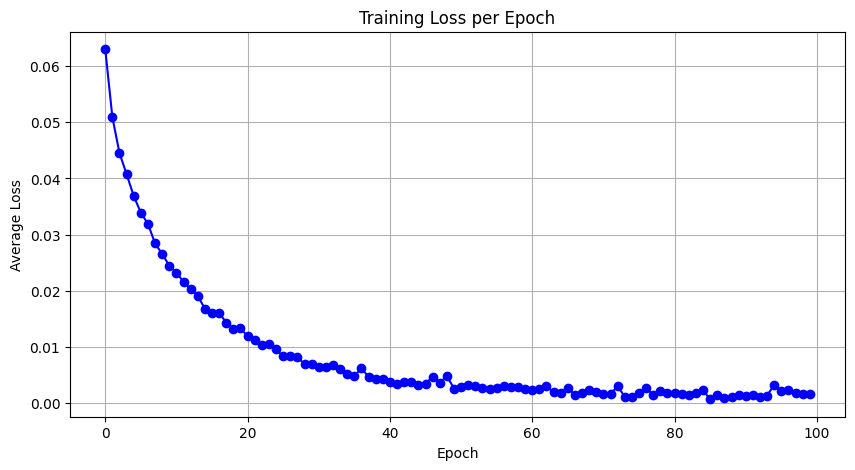

In [ ]:
train(device, model, train_loader, epochs=100)

In [ ]:
test(model, device, test_loader)

Accuracy on the test set: 98.54%
